In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import moments.LD
import numpy as np

In [2]:
Ne = 10_000
mu = 2e-8
r = 1.25e-5
theta = 4 * Ne * mu
rho = 4 * Ne * r

In [3]:
1 / (4 * Ne), theta, rho

(2.5e-05, 0.0008, 0.5)

In [4]:
moments_result = moments.LD.Demographics1D.snm(
    rho=np.arange(11) * 4 * Ne * r, theta=theta
)
print(moments_result.names())
print(moments_result)
moments_ld_stats = np.vstack(moments_result[:-1])
moments_d2 = moments_ld_stats[:, 0]
moments_dz = moments_ld_stats[:, 1]
moments_pi2 = moments_ld_stats[:, 2]

(['DD_0_0', 'Dz_0_0_0', 'pi2_0_0_0_0'], ['H_0_0'])
LDstats([[8.88888889e-08 7.11111111e-08 1.95555556e-07]
 [6.78787879e-08 5.17171717e-08 1.85858586e-07]
 [5.50000000e-08 4.00000000e-08 1.80000000e-07]
 [4.62893082e-08 3.22012579e-08 1.76100629e-07]
 [4.00000000e-08 2.66666667e-08 1.73333333e-07]
 [3.52422907e-08 2.25550661e-08 1.71277533e-07]
 [3.15151515e-08 1.93939394e-08 1.69696970e-07]
 [2.85148515e-08 1.68976898e-08 1.68448845e-07]
 [2.60465116e-08 1.48837209e-08 1.67441860e-07]
 [2.39793282e-08 1.32299742e-08 1.66614987e-07]
 [2.22222222e-08 1.18518519e-08 1.65925926e-07]], [0.0008], num_pops=1, pop_ids=None)


In [5]:
sim_results = Path(
    "~/simulation-outputs/branch-stat-validation/output-1584096/result"
).expanduser()

In [6]:
sim_data = np.dstack([np.load(path)["arr_0"] for path in sim_results.iterdir()]).mean(2)
d2 = sim_data[0]
dz = sim_data[1]
pi2 = sim_data[2]

In [7]:
def relative_error(observed, expected):
    return np.abs(observed - expected) / expected

In [10]:
results = list(
    zip(
        [moments_d2, moments_dz, moments_pi2],
        [d2, dz, pi2],
        ["$D^2$", "$D_z$", "$\pi_2$"],
    )
)


def plot_results(results):
    fig, axes = plt.subplots(2, 3, figsize=(10, 6))
    fig.suptitle("Comparison of two-locus statistics from Moments and tskit")
    for i, (moments, tskit, label) in enumerate(results):
        axes[0, i].plot(moments, ".-", label="moments")
        axes[0, i].plot(tskit, ".-", label="tskit")
        axes[1, i].plot(relative_error(tskit, moments), ".-", label="Relative Error")
        axes[0, i].set_title(label)
        for ax in axes[:, i]:
            ax.legend()
            ax.set_xticks
            ax.set_xticks(np.arange(len(moments), step=2))
            ax.set_xticklabels(
                [
                    f"${int(i)}N_er$"
                    for i in np.arange(len(moments), step=2) * 4 * Ne * r
                ]
            )
    fig.tight_layout()

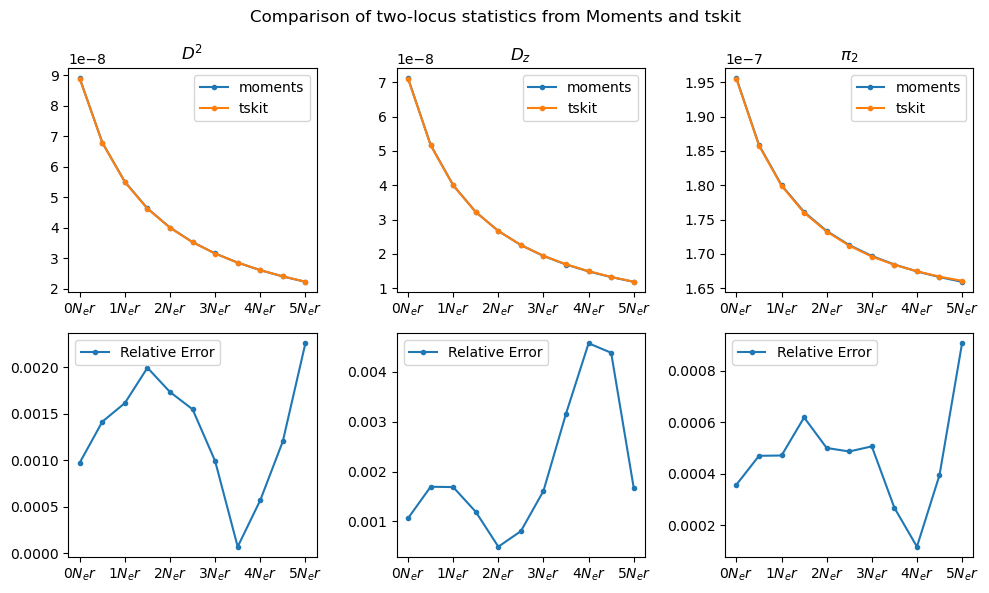

In [11]:
plot_results(results)